##Downloading MODIS burned area for 2024 from GEE and EDA on 2024 data.
***********************************************************
**Date**: 13th Dec 2024

**Authored by**: Priyanka N
***********************************************************
The MODIS burned area data is dowmloaded for 2024 in GeoTiff and GeoJSON formats.

MODIS burned area data specifications:
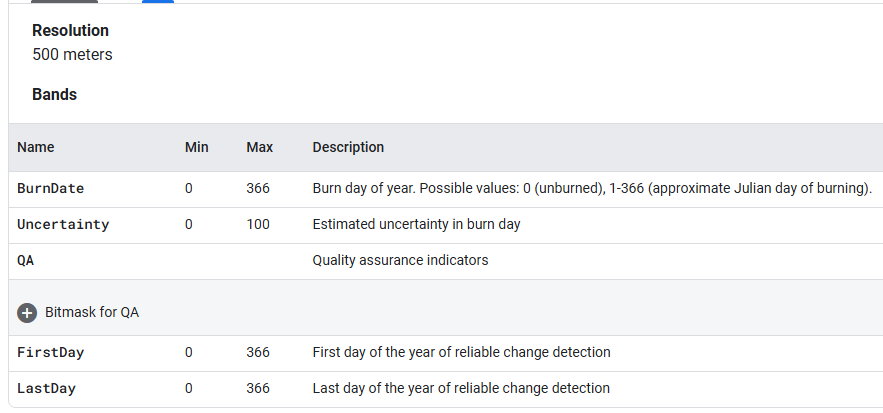

Exploratory data analysis is performed on 2024 data district wise and Histogram plots are plotted for burned area and fire duration.

Fire duration is calculated using the below formula:

###Fire Duration = LastDay - FirstDay


# Installing required libraries

In [ ]:
!pip install earthengine-api geemap pycrs --q

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.4 MB/s eta 0:00:00


In [ ]:
import ee
import geemap

# Connecting to Google earth engine

In [ ]:
ee.Authenticate()

In [ ]:
ee.Initialize(project="ee-nprinka235")

Loading the Uttarakhand shapefile and reading it as ROI.

In [ ]:
# Load a shapefile using geemap
shapefile = '/content/drive/MyDrive/Colab Notebooks/Forest_fire_prediction/Uttarakhand/uttarakhand_WGS1984.shp'
roi = geemap.shp_to_ee(shapefile)

Loading the MODIS Burned area collection for 2024.

In [ ]:
burn_date_collection = ee.ImageCollection("MODIS/061/MCD64A1") \
    .filterDate("2024-01-01", "2024-12-31")
print(burn_date_collection.size().getInfo())  # Verify collection size


9


In [ ]:
burn_date_collection

So, in for the year 2024, we have 9 images : 1 image/month

## Plot of all 9 images

In [ ]:
# Define a map using geemap
Map = geemap.Map()

# Define visualization parameters for the burned areas
vis_params = {
    'min': 1,  # Minimum burn day (1st day of the year)
    'max': 366,  # Maximum burn day
    'palette': ['black', 'red', 'orange', 'yellow'],  # Burn area color scale
}

# Convert the collection to a list to iterate
image_list = burn_date_collection.toList(burn_date_collection.size())

for i in range(burn_date_collection.size().getInfo()):
    # Get the ith image and select the 'BurnDate' band
    image = ee.Image(image_list.get(i)).select('BurnDate').clip(roi)

    # Add the image to the map with a unique layer name
    Map.addLayer(image, vis_params, f'Burned Area {i + 1}')

# Display the map
Map.add_layer_control()  # Add a layer control to toggle layers on/off
Map


Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

Downloading the images in GeoTiff and GeoJson formats

In [ ]:
# Load the MODIS Burned Area dataset for 2024
burn_date_collection = ee.ImageCollection("MODIS/061/MCD64A1") \
    .filterDate("2024-01-01", "2024-12-31") \
    .filterBounds(roi)

# Get the list of images in the collection
image_list = burn_date_collection.toList(burn_date_collection.size())

# Export each image as a .tif and vector (GeoJSON or Shapefile)
for i in range(burn_date_collection.size().getInfo()):
    # Get the ith image
    image = ee.Image(image_list.get(i))
    image = image.toInt16()  # Convert all bands to Int16
    # Set the image ID as the export file name
    image_id = image.get('system:index').getInfo()

    # Export the image as a .tif file
    task = ee.batch.Export.image.toDrive(
        image=image,
        description=f'BurnedArea_{image_id}_tif',
        fileFormat='GeoTIFF',
        folder="Burned_Area_Exports",
        region=roi.geometry(),
        scale=500,
        maxPixels=1e8
    )
    task.start()
    print(f"Exporting image {image_id} as .tif")

    # Convert the image to vectors
    vectors = image.reduceToVectors(
        geometryType='polygon',
        reducer=ee.Reducer.mean(),
        scale=500,
        maxPixels=1e13,
        geometry=roi
    )

    # Export the vector data as a GeoJSON (or Shapefile)
    vector_task = ee.batch.Export.table.toDrive(
        collection=vectors,
        description=f'BurnedArea_{image_id}_GeoJSON',
        fileFormat='GeoJSON',
        folder="Burned_Area_Exports"
    )
    vector_task.start()
    print(f"Exporting vector data for image {image_id} as GeoJSON")

print("Exports started. Check your Google Drive for the result.")


Exporting image 2024_01_01 as .tif
Exporting vector data for image 2024_01_01 as GeoJSON
Exporting image 2024_02_01 as .tif
Exporting vector data for image 2024_02_01 as GeoJSON
Exporting image 2024_03_01 as .tif
Exporting vector data for image 2024_03_01 as GeoJSON
Exporting image 2024_04_01 as .tif
Exporting vector data for image 2024_04_01 as GeoJSON
Exporting image 2024_05_01 as .tif
Exporting vector data for image 2024_05_01 as GeoJSON
Exporting image 2024_06_01 as .tif
Exporting vector data for image 2024_06_01 as GeoJSON
Exporting image 2024_07_01 as .tif
Exporting vector data for image 2024_07_01 as GeoJSON
Exporting image 2024_08_01 as .tif
Exporting vector data for image 2024_08_01 as GeoJSON
Exporting image 2024_09_01 as .tif
Exporting vector data for image 2024_09_01 as GeoJSON
Exports started. Check your Google Drive for the result.


## Reading the first image

In [ ]:
first_image = burn_date_collection.first()
burn_date = first_image.select("BurnDate")  # Select BurnDate band
print(burn_date.getInfo())  # Check the details of the BurnDate band


{'type': 'Image', 'bands': [{'id': 'BurnDate', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -32768, 'max': 32767}, 'dimensions': [86400, 31200], 'crs': 'SR-ORG:6974', 'crs_transform': [463.3127165279165, 0, -20015109.354, 0, -463.3127165279167, 7783653.6376640005]}], 'version': 1709851165326096, 'id': 'MODIS/061/MCD64A1/2024_01_01', 'properties': {'system:time_start': 1704067200000, 'google:max_source_file_timestamp': 1709768517000, 'system:footprint': {'type': 'LinearRing', 'coordinates': [[-180, -90], [180, -90], [180, 90], [-180, 90], [-180, -90]]}, 'system:time_end': 1706659200000, 'system:asset_size': 585972039, 'system:index': '2024_01_01'}}


## Daily data for 1st image in the collecton of 9 images.


In [ ]:
daily_histograms = []
for day in range(1, 367):
    mask = burn_date.eq(day)  # Mask pixels with the current burn day
    masked_image = burn_date.updateMask(mask)  # Apply mask

    # Calculate the area of burned pixels
    pixel_area = masked_image.multiply(ee.Image.pixelArea())
    area_sum = pixel_area.reduceRegion(
        reducer=ee.Reducer.sum(),
        geometry=roi,
        scale=500,
        maxPixels=1e13
    )
    daily_histograms.append((day, area_sum.get("BurnDate")))
print(daily_histograms)


[(1, <ee.computedobject.ComputedObject object at 0x7eeca3533970>), (2, <ee.computedobject.ComputedObject object at 0x7eeca2db68c0>), (3, <ee.computedobject.ComputedObject object at 0x7eeca2db61a0>), (4, <ee.computedobject.ComputedObject object at 0x7eeca2db7160>), (5, <ee.computedobject.ComputedObject object at 0x7eeca2effdf0>), (6, <ee.computedobject.ComputedObject object at 0x7eeca3731ab0>), (7, <ee.computedobject.ComputedObject object at 0x7eeca3532260>), (8, <ee.computedobject.ComputedObject object at 0x7eeca3533760>), (9, <ee.computedobject.ComputedObject object at 0x7eeca3533670>), (10, <ee.computedobject.ComputedObject object at 0x7eeca2db5f00>), (11, <ee.computedobject.ComputedObject object at 0x7eeca2db7430>), (12, <ee.computedobject.ComputedObject object at 0x7eeca2db64d0>), (13, <ee.computedobject.ComputedObject object at 0x7eeca2db6650>), (14, <ee.computedobject.ComputedObject object at 0x7eeca27866e0>), (15, <ee.computedobject.ComputedObject object at 0x7eeca2787a60>), (16

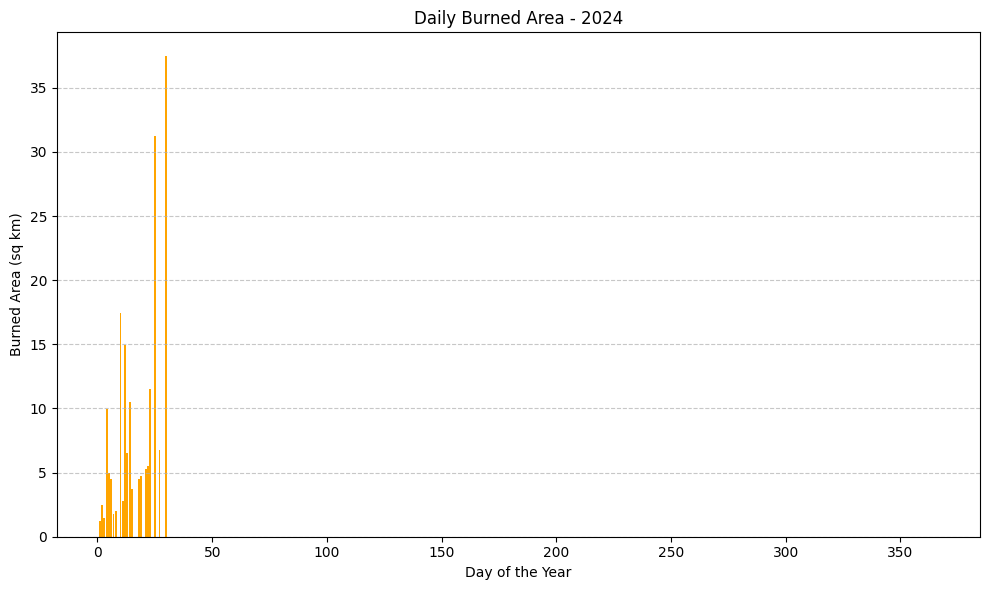

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Retrieve the actual values from Earth Engine
data = {"Day": [], "BurnedArea": []}
for day, ee_area in daily_histograms:
    burned_area = ee_area.getInfo()  # Convert ee.ComputedObject to Python value
    data["Day"].append(day)
    # Convert square meters to square kilometers (divide by 1,000,000)
    data["BurnedArea"].append(burned_area / 1e6 if burned_area else 0)

# Convert to Pandas DataFrame
df = pd.DataFrame(data)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.bar(df["Day"], df["BurnedArea"], color='orange', width=0.8)
plt.xlabel("Day of the Year")
plt.ylabel("Burned Area (sq km)")
plt.title("Daily Burned Area - 2024")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


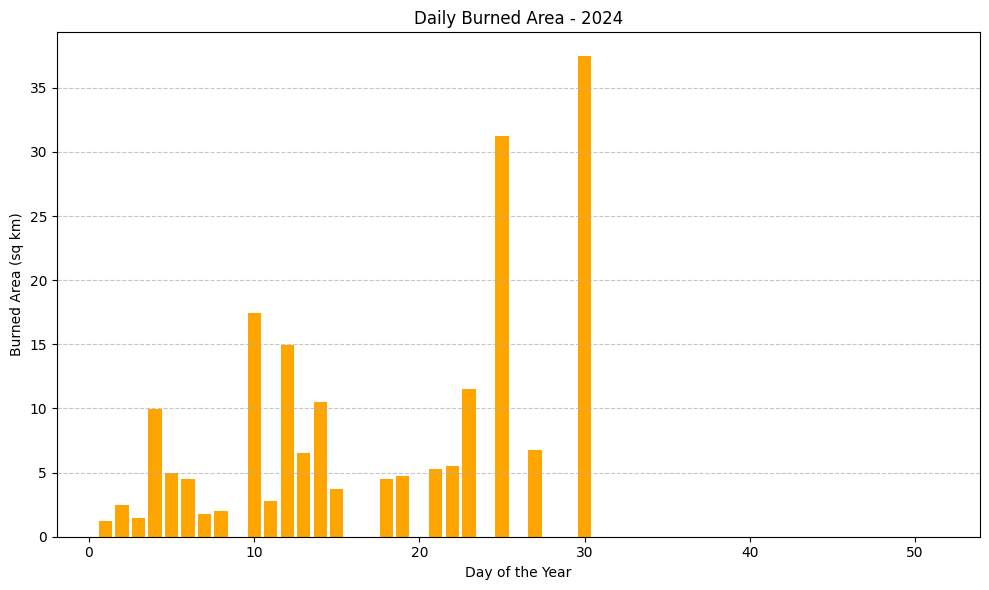

In [ ]:
# Convert to Pandas DataFrame
df_subset = df[0:51]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.bar(df_subset["Day"], df_subset["BurnedArea"], color='orange', width=0.8)
plt.xlabel("Day of the Year")
plt.ylabel("Burned Area (sq km)")
plt.title("Daily Burned Area - 2024")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
df_subset[0:31]

,Day,BurnedArea
0,1,1.248588
1,2,2.497099
2,3,1.498295
3,4,9.988085
4,5,4.994437
5,6,4.494492
6,7,1.748013
7,8,1.997753
8,9,0.000000
9,10,17.480503


# Histogram plots for all the 9 images

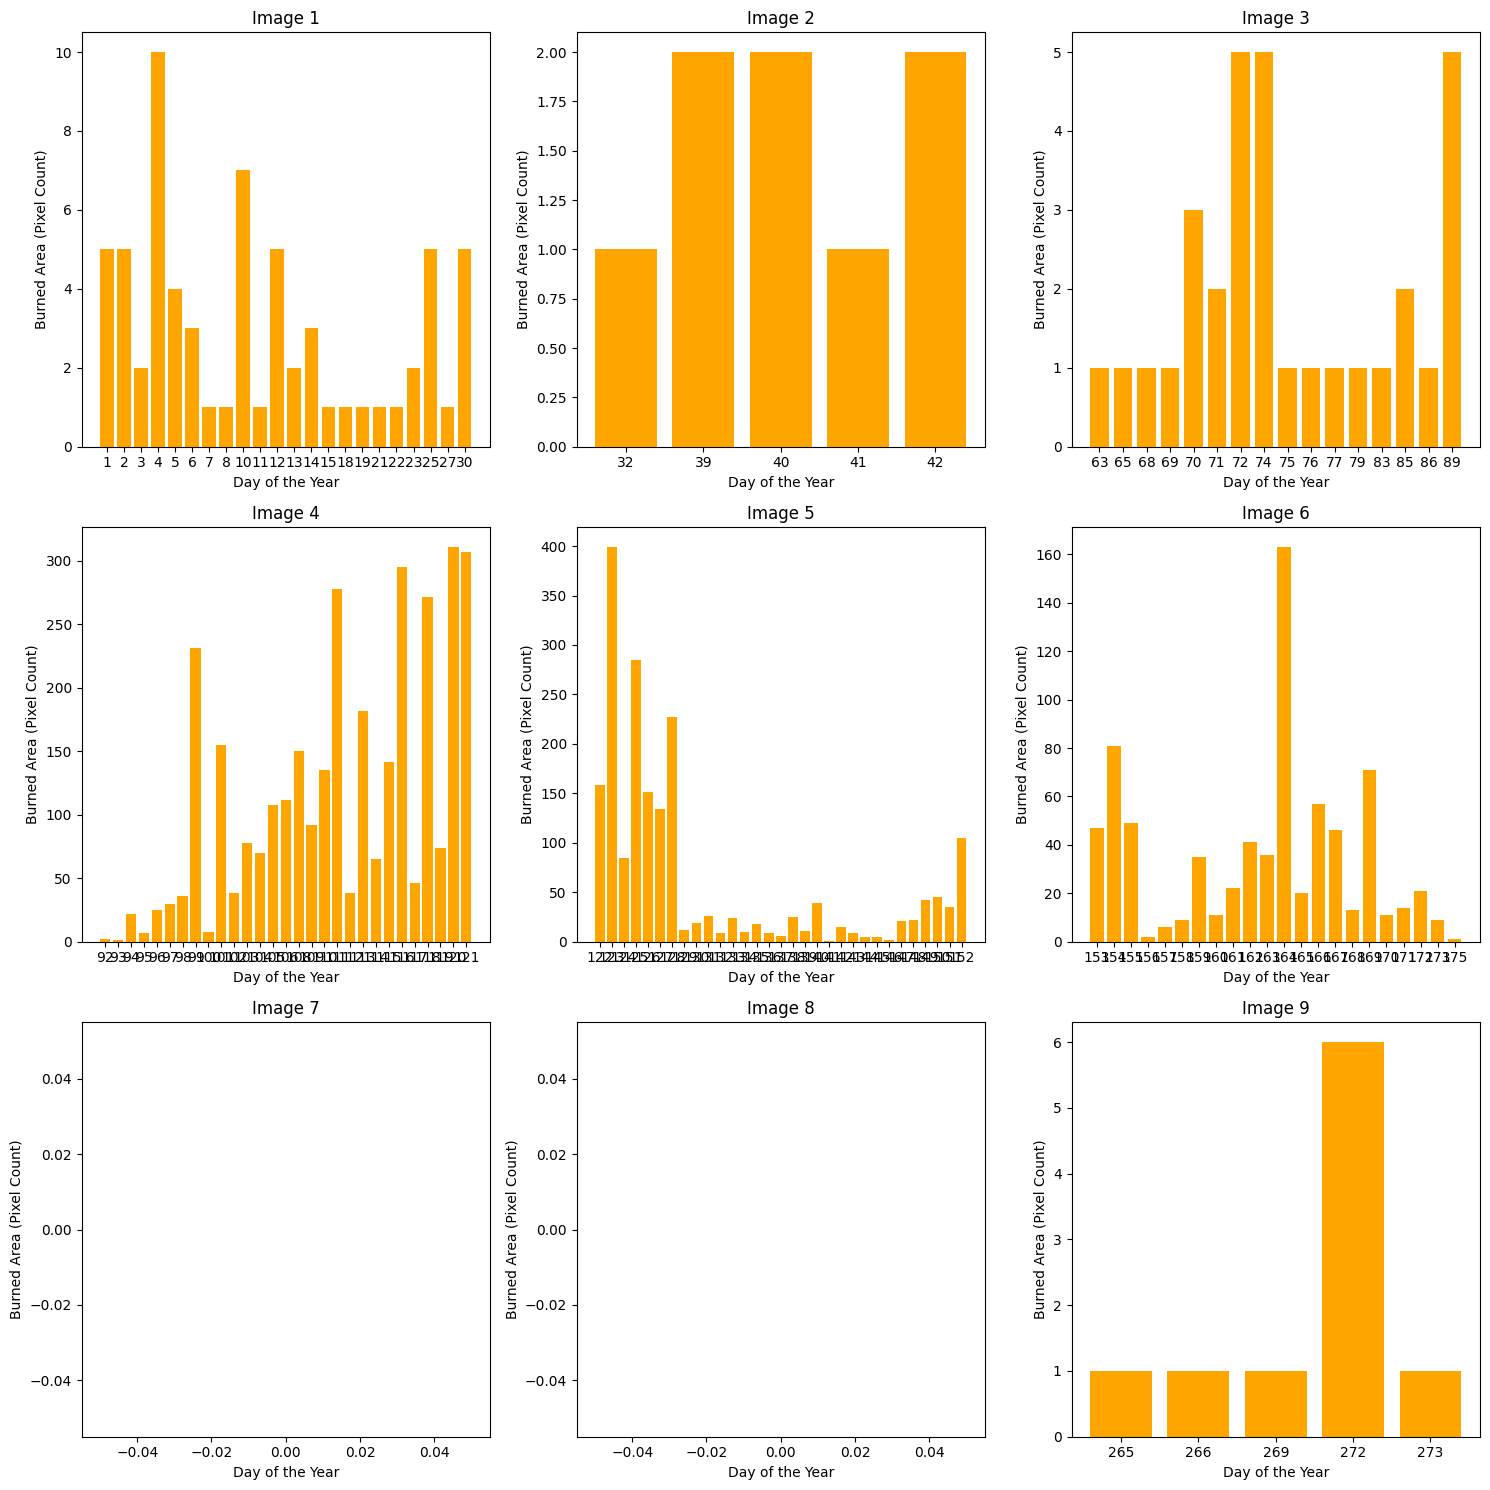

In [ ]:
# Create a list of all images in the collection
image_list = burn_date_collection.toList(burn_date_collection.size())

# Loop through all images and compute daily histograms
daily_histograms = []
for i in range(burn_date_collection.size().getInfo()):
    # Get the ith image
    image = ee.Image(image_list.get(i)).select('BurnDate')

    # Compute histogram (count of pixels for each burn day)
    histogram = image.reduceRegion(
        reducer=ee.Reducer.frequencyHistogram(),
        geometry=roi,  # Use ROI for analysis
        scale=500,  # Pixel resolution
        maxPixels=1e9
    ).get('BurnDate')

    # Convert histogram from EE to Python dictionary
    histogram_dict = ee.Dictionary(histogram).getInfo()

    # Add to the list for plotting
    daily_histograms.append(histogram_dict)

# Plot histograms for all images
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # Adjust grid size for 9 images
axes = axes.flatten()  # Flatten axes for easier iteration

for i, hist_data in enumerate(daily_histograms):
    # Sort days for consistent plotting
    days = sorted(hist_data.keys(), key=int)
    counts = [hist_data[day] for day in days]

    # Plot histogram
    axes[i].bar(days, counts, color='orange')
    axes[i].set_title(f'Image {i + 1}')
    axes[i].set_xlabel('Day of the Year')
    axes[i].set_ylabel('Burned Area (Pixel Count)')

# Adjust layout
plt.tight_layout()
plt.show()


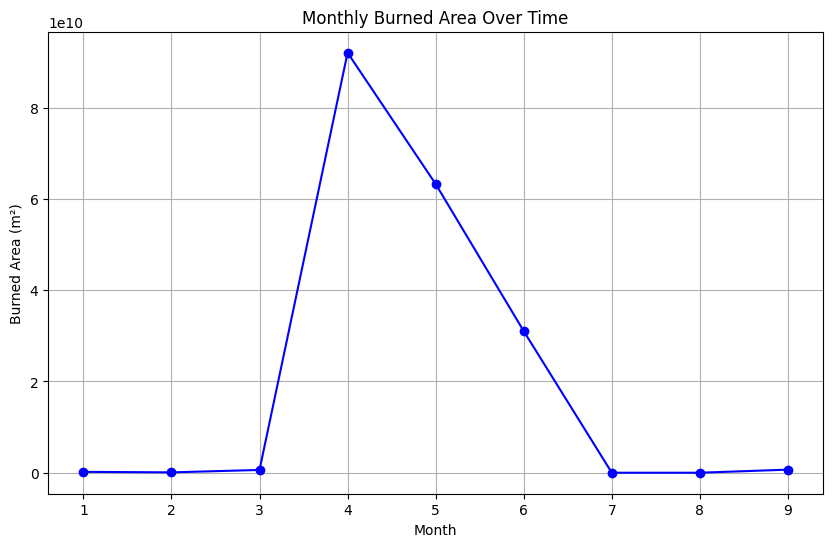

In [ ]:
# Define a list to store the monthly burned area data
monthly_areas = []

# Loop over the image collection (assuming burn_date_collection contains monthly data)
image_list = burn_date_collection.toList(burn_date_collection.size())

# Loop through all images (representing months) and calculate the burned area
for i in range(burn_date_collection.size().getInfo()):
    image = ee.Image(image_list.get(i))

    # Mask and compute the burned area (multiply by pixel area)
    pixel_area = image.multiply(ee.Image.pixelArea())
    area_sum = pixel_area.reduceRegion(
        reducer=ee.Reducer.sum(),
        geometry=roi,
        scale=500,  # resolution of 500m
        maxPixels=1e8
      )

    # Append the result (month and burned area) to the list
    area_value = area_sum.get('BurnDate')
    monthly_areas.append(area_value)

# Convert the monthly data into a pandas DataFrame
months = range(1, len(monthly_areas) + 1)  # 1 to 12 months
df = pd.DataFrame({
    'Month': months,
    'Burned Area (m²)': [area.getInfo() for area in monthly_areas]
})

# Plot the time series using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['Burned Area (m²)'], marker='o', linestyle='-', color='b')
plt.title('Monthly Burned Area Over Time')
plt.xlabel('Month')
plt.ylabel('Burned Area (m²)')
plt.xticks(df['Month'])
plt.grid(True)
plt.show()


In [ ]:
df

,Month,Burned Area (m²)
0,1,1.912714e+08
1,2,7.865086e+07
2,3,6.087205e+08
3,4,9.207835e+10
4,5,6.329822e+10
5,6,3.104621e+10
6,7,0.000000e+00
7,8,0.000000e+00
8,9,6.753536e+08


In [ ]:
# Function to compute daily burned area for a given image
def calculate_daily_burned_area(image, roi):
    daily_histograms = []
    for day in range(1, 367):
        mask = image.eq(day)  # Mask pixels with the current burn day
        masked_image = image.updateMask(mask)  # Apply mask

        # Calculate the area of burned pixels
        pixel_area = masked_image.multiply(ee.Image.pixelArea())
        area_sum = pixel_area.reduceRegion(
            reducer=ee.Reducer.sum(),
            geometry=roi,
            scale=500,
            maxPixels=1e13
        )

        # Store the daily burned area
        daily_histograms.append((day, area_sum.get("BurnDate")))

    return daily_histograms


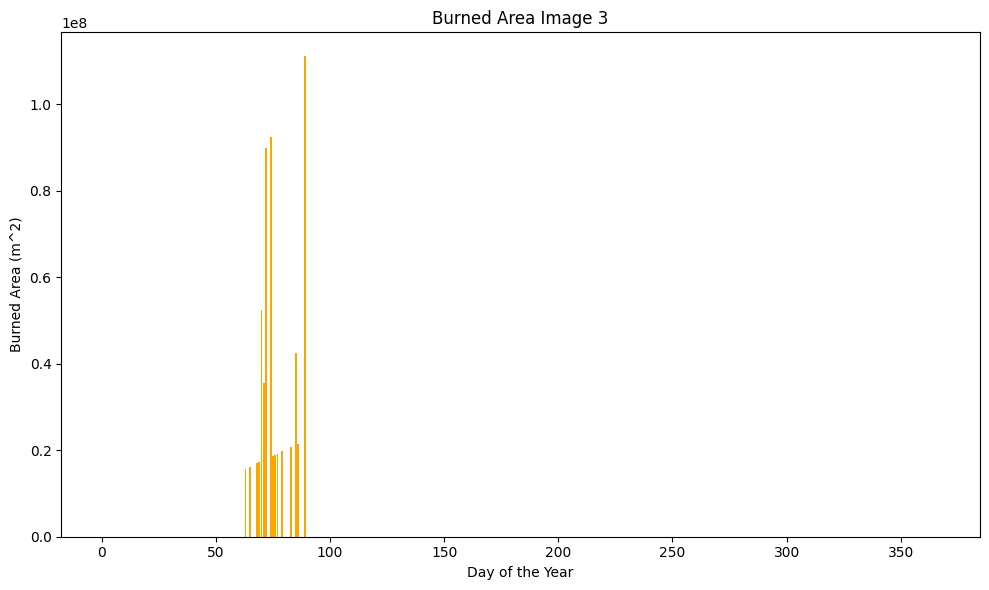

KeyboardInterrupt: 

In [ ]:
# Process images one by one and plot
for i in range(burn_date_collection.size().getInfo()):
    # Get the current image
    image = ee.Image(image_list.get(i)).select('BurnDate')  # Select 'BurnDate' band

    # Calculate daily burned area for the current image
    daily_histograms = calculate_daily_burned_area(image, roi)

    # Sort days for consistent plotting
    days = [x[0] for x in daily_histograms]
    areas = [x[1].getInfo() if x[1].getInfo() is not None else 0 for x in daily_histograms]

    # Plot burned area (in m^2) for the current image
    plt.figure(figsize=(10, 6))
    plt.bar(days, areas, color='orange')
    plt.title(f'Burned Area Image {i + 1}')
    plt.xlabel('Day of the Year')
    plt.ylabel('Burned Area (m^2)')
    plt.tight_layout()
    plt.show()


# Reading the GeoJSON file for the month of March.

In [1]:
import geopandas as gpd

# Read GeoJSON file
geojson_file = "/content/drive/MyDrive/Burned_Area_Exports/BurnedArea_2024_03_01_GeoJSON.geojson"
gdf = gpd.read_file(geojson_file)

# Display the first few rows
gdf.head()

,id,FirstDay,LastDay,QA,Uncertainty,label,geometry
0,+55296+8934,41.0,114.0,3.0,1.0,72,"POLYGON ((79.12259 29.82285, 79.12777 29.82285..."
1,+55342+9005,40.0,115.0,3.0,1.0,74,"POLYGON ((79.10955 29.50359, 79.11471 29.50359..."
2,+55343+9005,40.0,115.0,3.0,1.0,71,"POLYGON ((79.11471 29.50359, 79.11988 29.50359..."
3,+55345+9005,40.0,115.0,3.0,1.0,75,"POLYGON ((79.12505 29.50359, 79.13021 29.50359..."
4,+55347+9006,40.0,114.0,3.0,2.0,77,"POLYGON ((79.13187 29.4991, 79.13703 29.4991, ..."


In [ ]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [3]:
! pip install contextily --q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 51.1 MB/s eta 0:00:00


In [4]:
import contextily as ctx
import matplotlib.pyplot as plt

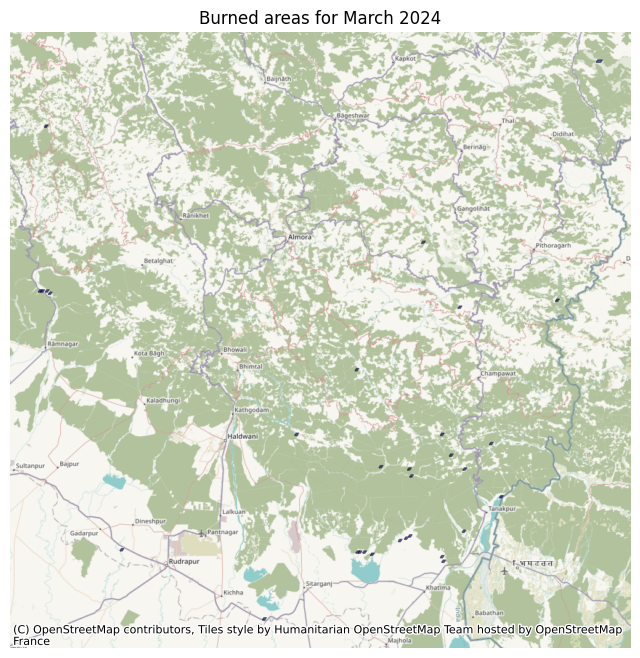

In [ ]:
# Project to Web Mercator for compatibility with contextily basemaps
gdf = gdf.to_crs(epsg=3857)

# Plot the GeoJSON data
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(ax=ax, color="blue", alpha=0.5, edgecolor="black")

# Add a basemap using contextily
ctx.add_basemap(ax, crs=gdf.crs)

# Customize plot
ax.set_title("Burned areas for March 2024")
ax.set_axis_off()

# Show the plot
plt.show()

# Total Burned area for all Months.

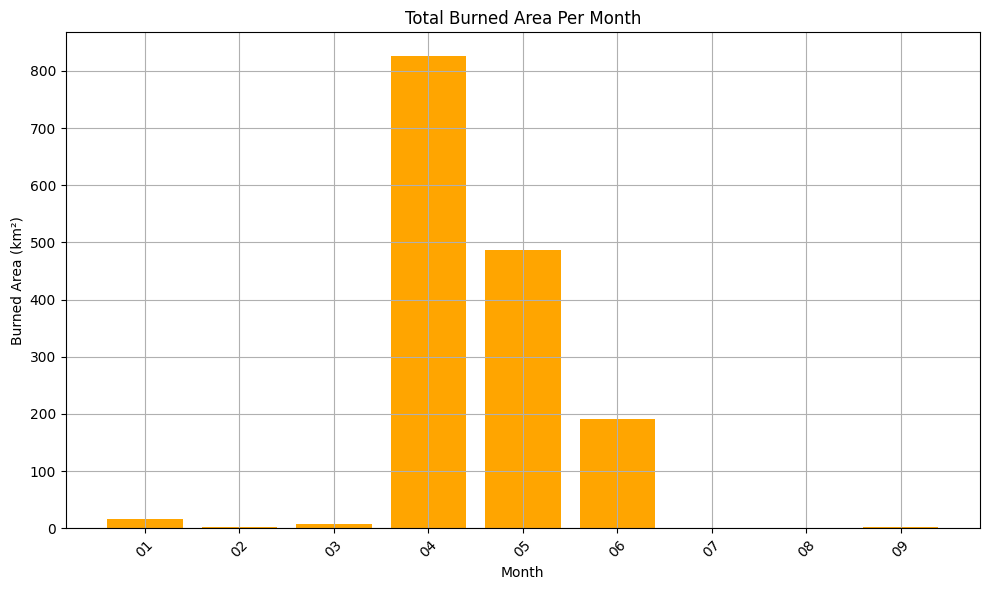

In [5]:
import glob
import pandas as pd

# Folder containing GeoJSON files
folder_path = "/content/drive/MyDrive/Burned_Area_Exports/"

# Create an empty DataFrame to store results
area_df = pd.DataFrame(columns=['Month', 'Burned Area (m²)'])

# Loop through each GeoJSON file in the folder
results = []
for file in glob.glob(f"{folder_path}/*.geojson"):
    gdf = gpd.read_file(file)
    gdf = gdf.to_crs(epsg=32644)  # Convert to a metric CRS for area calculation
    gdf['area_km2'] = gdf['geometry'].area / 1e6

    # Extract the month from the file name (adjust based on your file naming convention)
    month = file.split("/")[-1].split(".")[0].split("_")[2]  # Example: "January.geojson"

    # Calculate total burned area
    total_area = gdf['area_km2'].sum()

    # Store the result as a dictionary
    results.append({'Month': month, 'Burned Area (km²)': total_area})

# Convert the results into a DataFrame
area_df = pd.DataFrame(results)

# Sort by month (optional, depends on the order in your data)
area_df = area_df.sort_values('Month')

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(area_df['Month'], area_df['Burned Area (km²)'], color='orange')
plt.title('Total Burned Area Per Month')
plt.xlabel('Month')
plt.ylabel('Burned Area (km²)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid("on")
plt.show()


In [6]:
area_df

,Month,Burned Area (km²)
0,01,16.721269
1,02,1.997608
2,03,7.986191
3,04,826.041353
4,05,487.476901
5,06,191.120108
6,07,0.000000
7,08,0.000000
8,09,2.496163


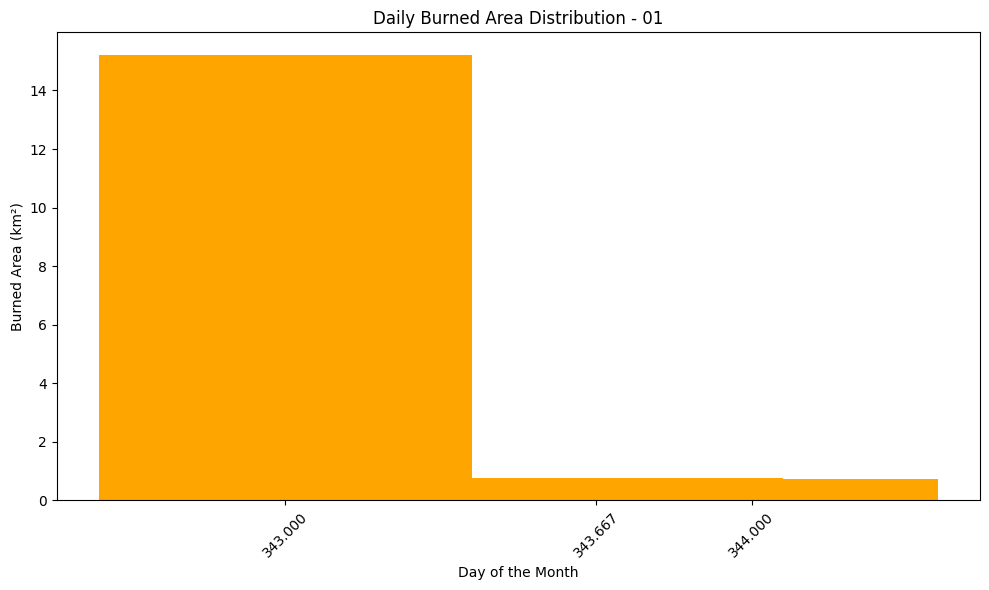

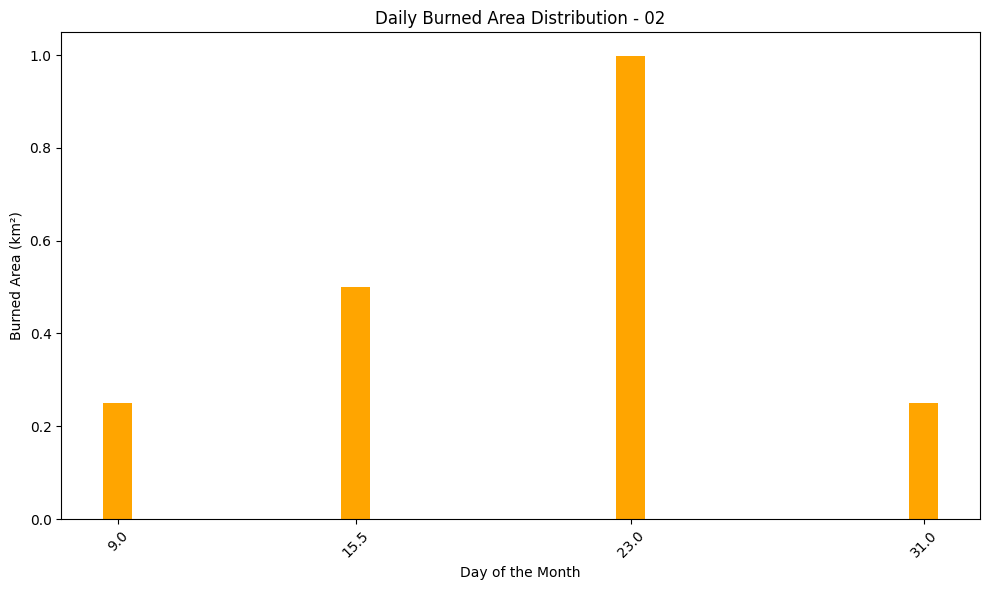

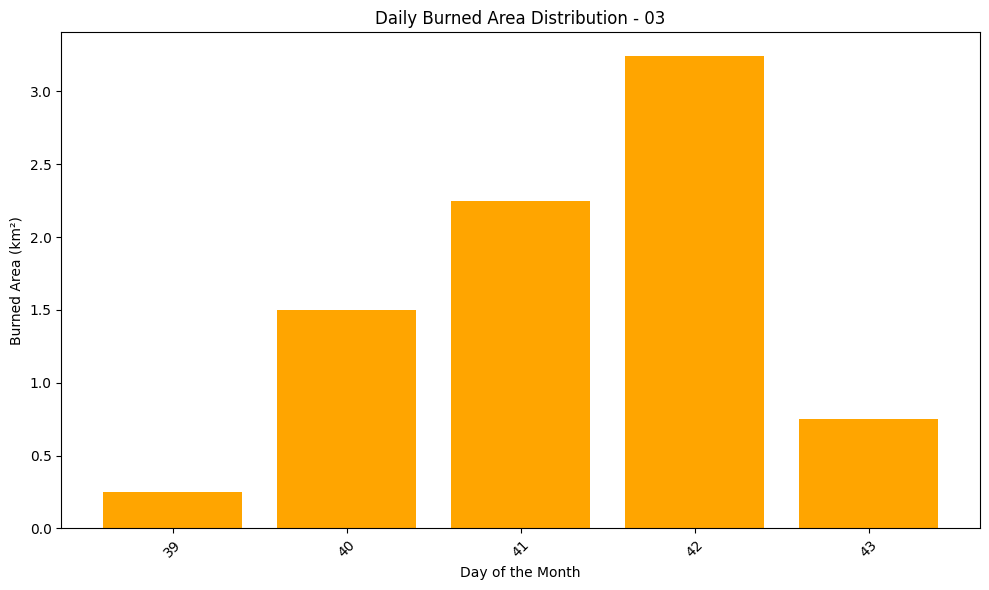

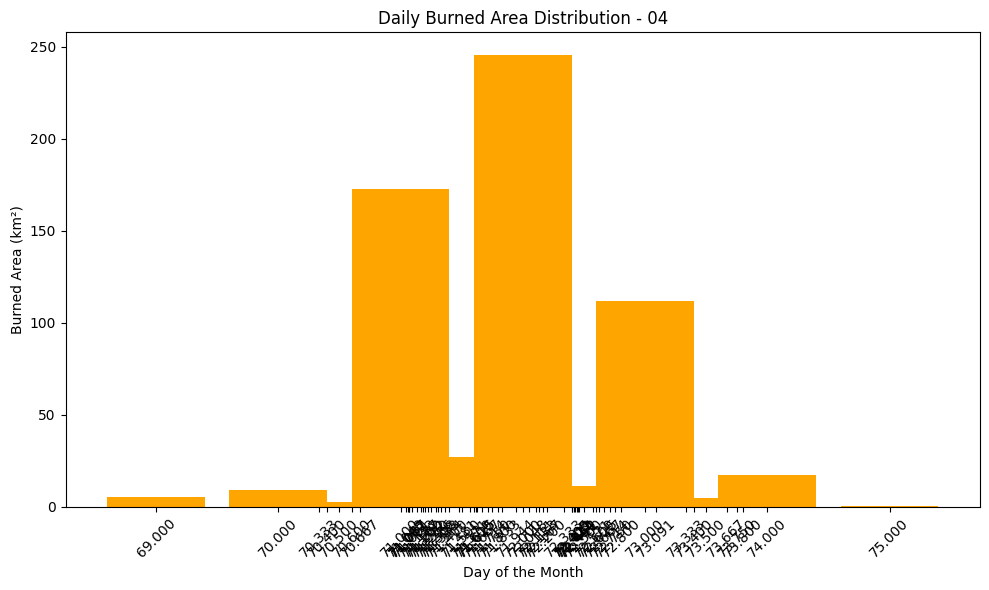

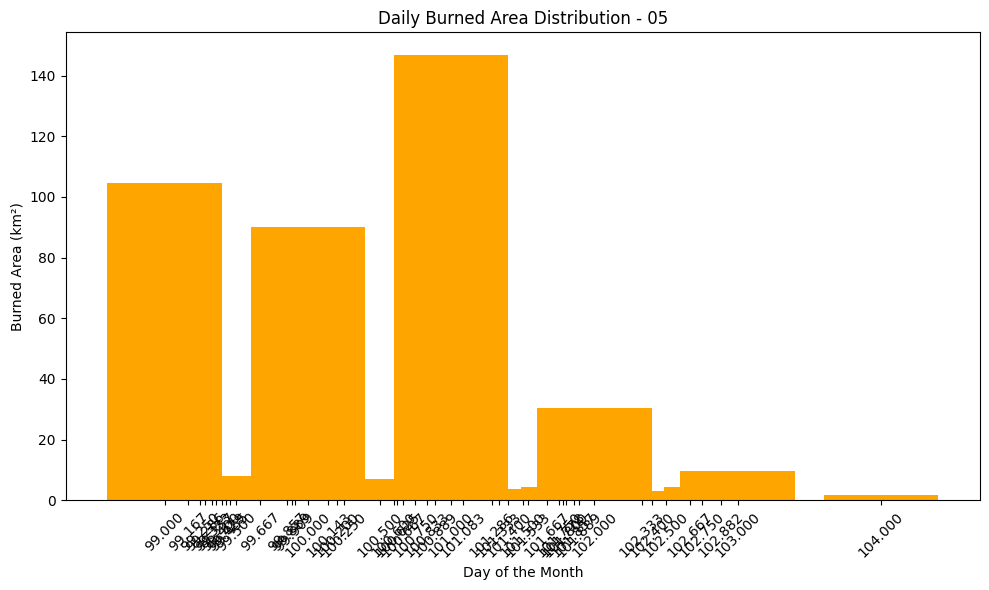

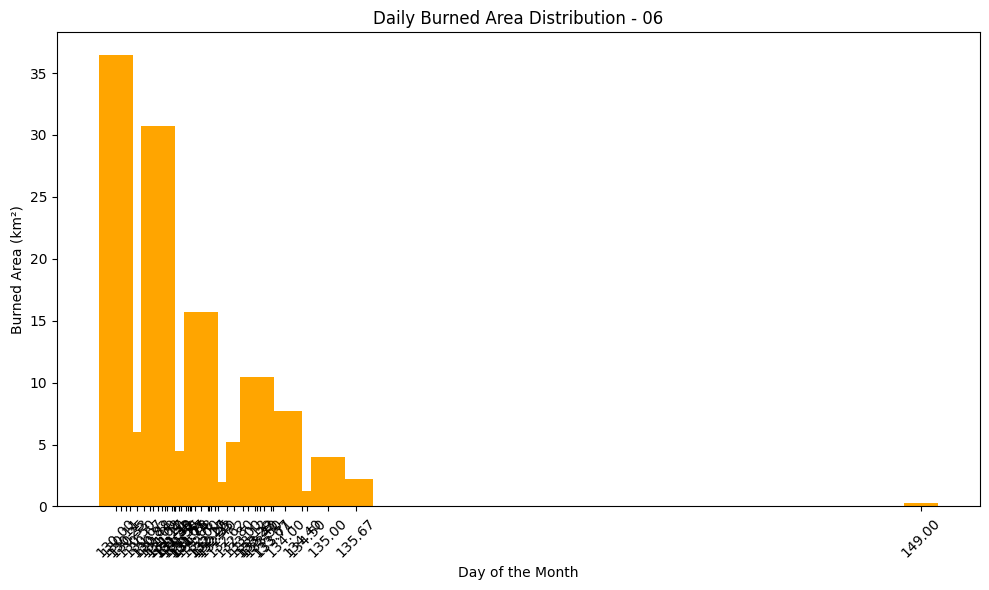

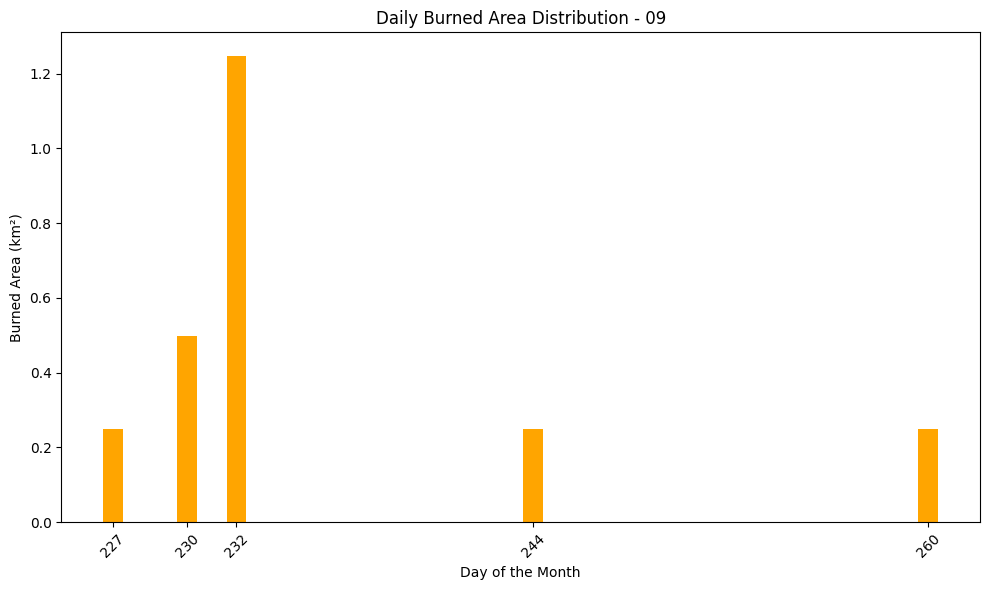

In [ ]:
# Loop through each GeoJSON file in the folder
for file in glob.glob(f"{folder_path}/*.geojson"):
    # Read the GeoJSON file into a GeoDataFrame
    gdf = gpd.read_file(file)
    gdf = gdf.to_crs(epsg=32644)  # Convert to a metric CRS for area calculation

    # Calculate area in km²
    gdf['area_km2'] = gdf['geometry'].area / 1e6

    # Extract the month name from the file name (adjust based on your file naming convention)
    month = file.split("/")[-1].split(".")[0].split("_")[2]  # Example: "January.geojson"

    # Group by "FirstDay" and sum the areas for each day
    if "FirstDay" in gdf.columns:
      daily_area = gdf.groupby('FirstDay')['area_km2'].sum().reset_index()
    else:
      continue
    # Plot the daily burned area distribution
    plt.figure(figsize=(10, 6))
    plt.bar(daily_area['FirstDay'], daily_area['area_km2'], color='orange')
    plt.title(f'Daily Burned Area Distribution - {month}')
    plt.xlabel('Day of the Month')
    plt.ylabel('Burned Area (km²)')
    plt.xticks(daily_area['FirstDay'], rotation=45)
    plt.tight_layout()
    plt.show()


In [7]:
import pandas as pd
import geopandas as gpd

# Reading the burned area data from 2012-2024 from the CSV file.

In [8]:
data_file_path = "/content/drive/MyDrive/Burnt areas 2012-2024/BurnedArea_Uttarakhand_Metadata.csv"
df_burned = pd.read_csv(data_file_path)

In [9]:
df_burned

,system:index,FirstDay,LastDay,QA,Uncertainty,Year,burned,.geo
0,2012_01_01_+55347+9039,344.0,54.0,3.0,1.0,2012,25,"{""geodesic"":false,""type"":""Polygon"",""coordinate..."
1,2012_01_01_+55348+9036,343.0,53.0,3.0,1.0,2012,17,"{""geodesic"":false,""type"":""Polygon"",""coordinate..."
2,2012_01_01_+55348+9037,344.0,53.0,3.0,1.0,2012,25,"{""geodesic"":false,""type"":""Polygon"",""coordinate..."
3,2012_01_01_+55349+9036,343.0,53.0,3.0,2.0,2012,18,"{""geodesic"":false,""type"":""Polygon"",""coordinate..."
4,2012_01_01_+55350+9037,343.0,53.0,3.0,1.0,2012,25,"{""geodesic"":false,""type"":""Polygon"",""coordinate..."
...,...,...,...,...,...,...,...,...
33053,2024_06_01_+55565+9144,130.0,195.0,3.0,1.0,2024,164,"{""geodesic"":false,""type"":""Polygon"",""coordinate..."
33054,2024_06_01_+55566+9140,130.0,198.0,3.0,1.0,2024,163,"{""geodesic"":false,""type"":""Polygon"",""coordinate..."
33055,2024_06_01_+55566+9141,130.0,198.0,3.0,1.0,2024,165,"{""geodesic"":false,""type"":""Polygon"",""coordinate..."
33056,2024_06_01_+55567+9140,130.0,195.0,3.0,1.0,2024,164,"{""geodesic"":false,""type"":""Polygon"",""coordinate..."


In [ ]:
df_burned[".geo"][0]

'{"geodesic":false,"type":"Polygon","coordinates":[[[79.01635477084395,29.35070922354979],[79.02151358021244,29.35070922354979],[79.02500140197871,29.355205826511526],[79.01984236491425,29.355205826511526],[79.01635477084395,29.35070922354979]]]}'

In [10]:
import json
from shapely.geometry import shape
# Convert the '.geo' column to geometries
df_burned['geometry'] = df_burned['.geo'].apply(lambda x: shape(json.loads(x)))

# Create a GeoDataFrame
gdf_burned = gpd.GeoDataFrame(df_burned, geometry='geometry')

# Set CRS for Uttarakhand (e.g., WGS 84 - EPSG:4326)
gdf_burned.set_crs(epsg=4326, inplace=True)


,system:index,FirstDay,LastDay,QA,Uncertainty,Year,burned,.geo,geometry
0,2012_01_01_+55347+9039,344.0,54.0,3.0,1.0,2012,25,"{""geodesic"":false,""type"":""Polygon"",""coordinate...","POLYGON ((79.01635 29.35071, 79.02151 29.35071..."
1,2012_01_01_+55348+9036,343.0,53.0,3.0,1.0,2012,17,"{""geodesic"":false,""type"":""Polygon"",""coordinate...","POLYGON ((79.03198 29.3642, 79.03714 29.3642, ..."
2,2012_01_01_+55348+9037,344.0,53.0,3.0,1.0,2012,25,"{""geodesic"":false,""type"":""Polygon"",""coordinate...","POLYGON ((79.02849 29.3597, 79.03365 29.3597, ..."
3,2012_01_01_+55349+9036,343.0,53.0,3.0,2.0,2012,18,"{""geodesic"":false,""type"":""Polygon"",""coordinate...","POLYGON ((79.03714 29.3642, 79.0423 29.3642, 7..."
4,2012_01_01_+55350+9037,343.0,53.0,3.0,1.0,2012,25,"{""geodesic"":false,""type"":""Polygon"",""coordinate...","POLYGON ((79.03881 29.3597, 79.04397 29.3597, ..."
...,...,...,...,...,...,...,...,...,...
33053,2024_06_01_+55565+9144,130.0,195.0,3.0,1.0,2024,164,"{""geodesic"":false,""type"":""Polygon"",""coordinate...","POLYGON ((79.77402 28.87857, 79.77916 28.87857..."
33054,2024_06_01_+55566+9140,130.0,198.0,3.0,1.0,2024,163,"{""geodesic"":false,""type"":""Polygon"",""coordinate...","POLYGON ((79.79298 28.89655, 79.79811 28.89655..."
33055,2024_06_01_+55566+9141,130.0,198.0,3.0,1.0,2024,165,"{""geodesic"":false,""type"":""Polygon"",""coordinate...","POLYGON ((79.78952 28.89206, 79.79466 28.89206..."
33056,2024_06_01_+55567+9140,130.0,195.0,3.0,1.0,2024,164,"{""geodesic"":false,""type"":""Polygon"",""coordinate...","POLYGON ((79.79811 28.89655, 79.80325 28.89655..."


In [11]:
#reproject to UTM Zone 44N for metric calculations

gdf_burned = gdf_burned.to_crs(epsg=32644)  # Reproject to UTM Zone 44N

# Calculate fire duration (in days)
gdf_burned['fire_duration'] = gdf_burned['LastDay'] - gdf_burned['FirstDay']

# Calculate burned area (in square kilometers)
gdf_burned['burned_area_km2'] = gdf_burned['geometry'].area / 1e6  # Convert from m² to km²


In [13]:
gdf_burned.head()

,system:index,FirstDay,LastDay,QA,Uncertainty,Year,burned,.geo,geometry,fire_duration,burned_area_km2
0,2012_01_01_+55347+9039,344.0,54.0,3.0,1.0,2012,25,"{""geodesic"":false,""type"":""Polygon"",""coordinate...","POLYGON ((307428.748 3248476.563, 307929.667 3...",-290.0,0.249713
1,2012_01_01_+55348+9036,343.0,53.0,3.0,1.0,2012,17,"{""geodesic"":false,""type"":""Polygon"",""coordinate...","POLYGON ((308971.082 3249946.005, 309471.999 3...",-290.0,0.249710
2,2012_01_01_+55348+9037,344.0,53.0,3.0,1.0,2012,25,"{""geodesic"":false,""type"":""Polygon"",""coordinate...","POLYGON ((308623.896 3249453.352, 309124.813 3...",-291.0,0.249711
3,2012_01_01_+55349+9036,343.0,53.0,3.0,2.0,2012,18,"{""geodesic"":false,""type"":""Polygon"",""coordinate...","POLYGON ((309471.999 3249937.575, 309972.914 3...",-290.0,0.249709
4,2012_01_01_+55350+9037,343.0,53.0,3.0,1.0,2012,25,"{""geodesic"":false,""type"":""Polygon"",""coordinate...","POLYGON ((309625.729 3249436.488, 310126.644 3...",-290.0,0.249708


In [ ]:
gdf_burned.to_file("fire_duration_and_area.geojson", driver="GeoJSON")

In [23]:
import matplotlib.pyplot as plt
def plot_histogram(gdf):
  # Plot Fire Duration Histogram
  plt.figure(figsize=(10, 6))
  plt.hist(gdf['fire_duration'], bins=70, range=(0,100),color='orange', alpha=0.7, edgecolor='black')
  plt.title("Distribution of Fire Durations")
  plt.xlabel("Duration (days)")
  plt.ylabel("Frequency")
  plt.grid("on")
  plt.show()

  # Plot Burned Area Histogram
  plt.figure(figsize=(10, 6))
  plt.hist(gdf['burned_area_km2'], bins=70, range=(0,6), color='green', alpha=0.7, edgecolor='black')
  plt.title("Distribution of Burned Areas")
  plt.xlabel("Burned Area (km²)")
  plt.ylabel("Frequency")
  plt.grid("on")
  plt.ylim(0, 5000)  # Set the y-axis range (e.g., max frequency to 50)
  plt.show()

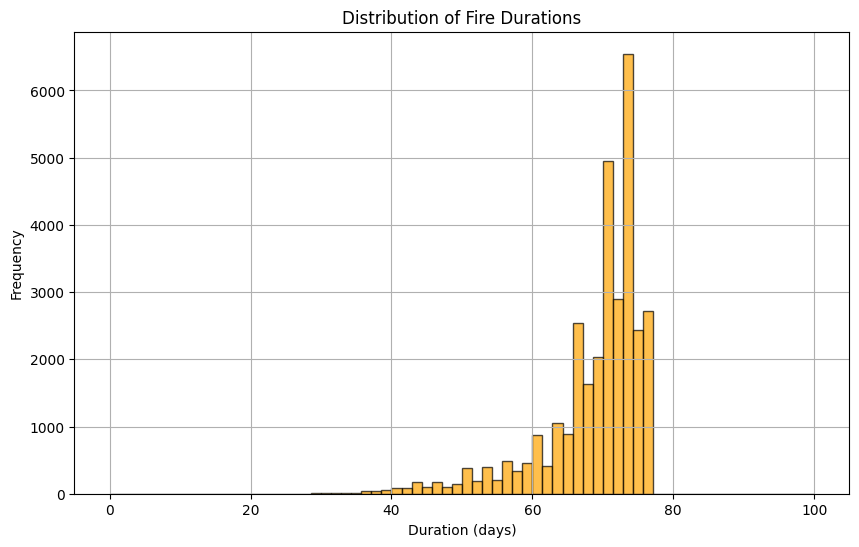

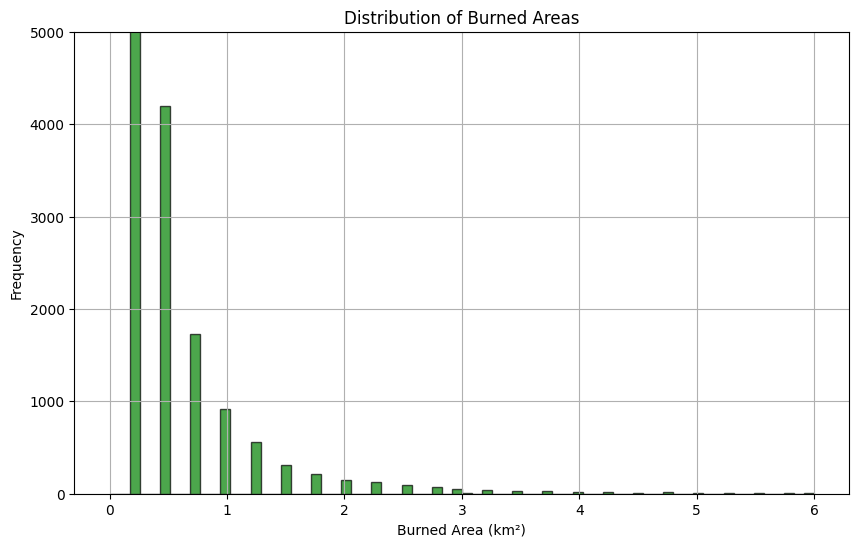

In [24]:
plot_histogram(gdf_burned)

In [25]:
gdf_burned_2024 = gdf_burned[gdf_burned['Year']==2024]

In [26]:
gdf_burned_2024.reset_index(drop=True,inplace=True)

In [ ]:
gdf_burned_2024.tail(2)

,system:index,FirstDay,LastDay,QA,Uncertainty,Year,burned,.geo,geometry,fire_duration,burned_area_km2
3496,2024_06_01_+55567+9140,130.0,195.0,3.0,1.0,2024,164,"{""geodesic"":false,""type"":""Polygon"",""coordinate...","POLYGON ((382815.201 3197118.576, 383316.011 3...",65.0,0.249547
3497,2024_06_01_+55567+9142,130.0,199.0,3.0,1.0,2024,164,"{""geodesic"":false,""type"":""Polygon"",""coordinate...","POLYGON ((380628.659 3196144.367, 382631.903 3...",69.0,1.497238


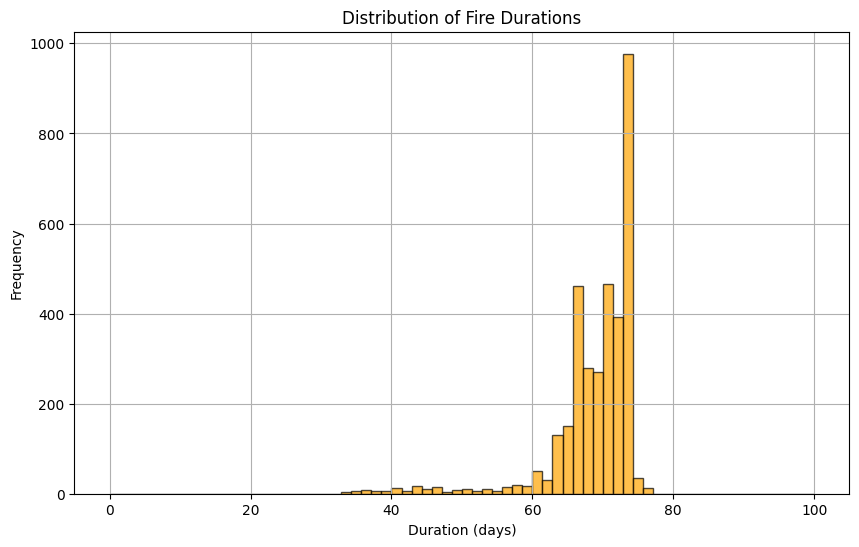

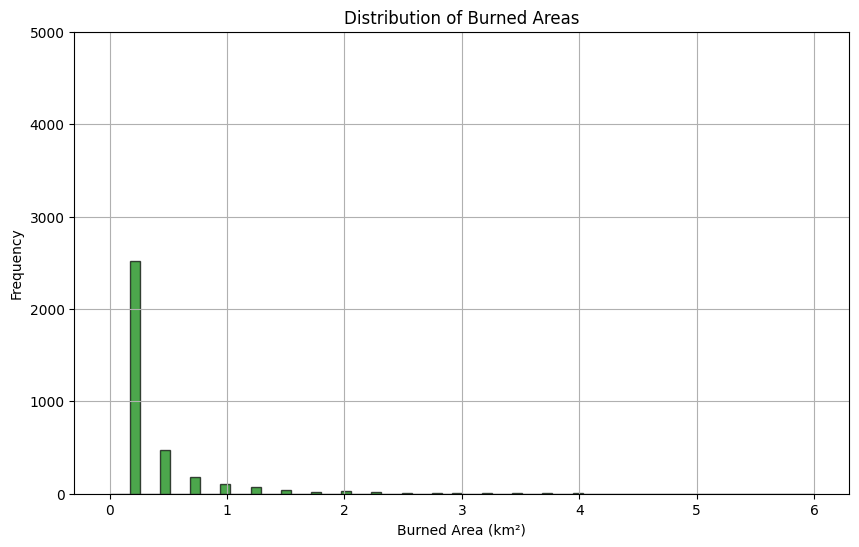

In [27]:
plot_histogram(gdf_burned_2024)

In [ ]:
districts_path = "/content/drive/MyDrive/Colab Notebooks/Forest_fire_prediction/Uttarakhand Districts/uttarakhand_districts.shp"
districts = gpd.read_file(districts_path)

In [ ]:
districts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
gdf_burned_2024.crs

<Projected CRS: EPSG:32644>
Name: WGS 84 / UTM zone 44N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 78°E and 84°E, northern hemisphere between equator and 84°N, onshore and offshore. China. India. Kazakhstan. Kyrgyzstan. Nepal. Russian Federation. Sri Lanka.
- bounds: (78.0, 0.0, 84.0, 84.0)
Coordinate Operation:
- name: UTM zone 44N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
gdf_burned.crs

<Projected CRS: EPSG:32644>
Name: WGS 84 / UTM zone 44N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 78°E and 84°E, northern hemisphere between equator and 84°N, onshore and offshore. China. India. Kazakhstan. Kyrgyzstan. Nepal. Russian Federation. Sri Lanka.
- bounds: (78.0, 0.0, 84.0, 84.0)
Coordinate Operation:
- name: UTM zone 44N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
districts_gdf = districts.to_crs(epsg=32644)

In [ ]:
districts_gdf.head(2)

,District,STATE,REMARKS,State_LGD,DISTRICT_L,Shape_Leng,Shape_Area,geometry
0,ALMORA,UTTARAKHAND,None,5,45,394957.247649,3.054452e+09,"POLYGON ((352554.096 3317492.942, 352662.951 3..."
1,BAGESHWAR,UTTARAKHAND,None,5,46,315673.159842,2.173076e+09,"POLYGON ((393018.416 3287407.893, 392677.168 3..."


In [ ]:
districts_gdf.columns

Index(['District', 'STATE', 'REMARKS', 'State_LGD', 'DISTRICT_L', 'Shape_Leng',
       'Shape_Area', 'geometry'],
      dtype='object')

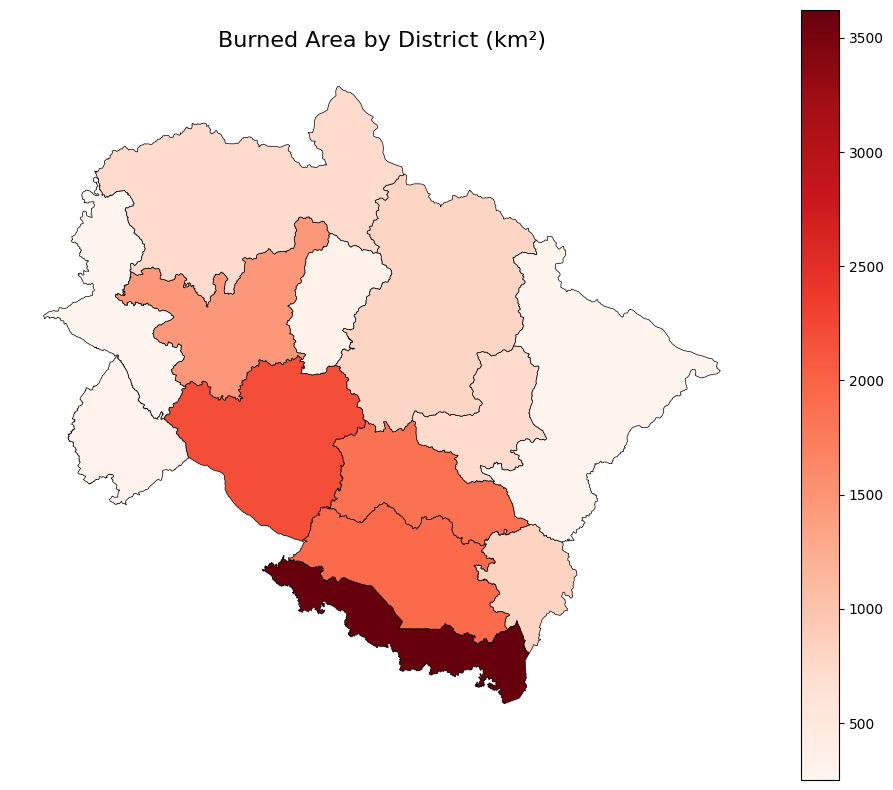

In [ ]:
# Perform spatial join to associate burned areas with districts
burned_with_districts = gpd.sjoin(gdf_burned, districts_gdf, how="inner", predicate="intersects")

# Aggregate burned area and fire duration statistics by district
district_analysis = (
    burned_with_districts.groupby("District")  # Replace with your district column name
    .agg(
        total_burned_area=("burned_area_km2", "sum"),
        avg_fire_duration=("fire_duration", "mean"),  # Assuming 'fire_duration' is in days
        max_fire_duration=("fire_duration", "max"),
        fire_count=("burned_area_km2", "count")  # Count of fires in the district
    )
    .reset_index()
)

# Merge aggregated data back with districts GeoDataFrame for mapping
districts_gdf_1 = districts_gdf.merge(district_analysis, on="District", how="left")

# Plot a choropleth map for total burned area
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
districts_gdf_1.plot(
    column="total_burned_area",
    cmap="Reds",
    legend=True,
    edgecolor="black",
    linewidth=0.5,
    ax=ax
)
ax.set_title("Burned Area by District (km²)", fontsize=16)
ax.axis("off")
plt.show()


In [ ]:
districts_gdf_1.columns

Index(['District', 'STATE', 'REMARKS', 'State_LGD', 'DISTRICT_L', 'Shape_Leng',
       'Shape_Area', 'geometry', 'total_burned_area', 'avg_fire_duration',
       'max_fire_duration', 'fire_count'],
      dtype='object')

In [ ]:
# Ensure the 'Year' column exists in the burned area data
if 'Year' not in gdf_burned.columns:
    print("Year column missing. Check your dataset!")
else:
    # Perform spatial join to associate burned areas with districts
    burned_with_districts = gpd.sjoin(gdf_burned, districts_gdf, how="inner", predicate="intersects")

    # Aggregate burned area and fire duration by district and year
    yearly_district_analysis = (
        burned_with_districts.groupby(["District", "Year"])
        .agg(
            total_burned_area=("burned_area_km2", "sum"),
            avg_fire_duration=("fire_duration", "mean"),
            max_fire_duration=("fire_duration", "max"),
            fire_count=("burned_area_km2", "count")  # Count of fires in the district
        )
        .reset_index()
    )

    # Save yearly data for further analysis
    yearly_district_analysis.to_csv("yearly_district_burned_area_analysis.csv", index=False)


In [ ]:
yearly_district_analysis

,District,Year,total_burned_area,avg_fire_duration,max_fire_duration,fire_count
0,ALMORA,2012,489.278133,70.454448,77.0,933
1,ALMORA,2013,17.227149,66.142857,76.0,35
2,ALMORA,2014,194.970967,54.478448,76.0,464
3,ALMORA,2015,48.435650,59.308411,75.0,107
4,ALMORA,2016,132.560235,67.082111,75.0,341
...,...,...,...,...,...,...
147,UTTARKASHI,2020,34.252630,-140.242424,76.0,99
148,UTTARKASHI,2021,2.251102,65.500000,66.0,4
149,UTTARKASHI,2022,39.490917,53.433735,75.0,83
150,UTTARKASHI,2023,6.749974,-291.235294,-290.0,17


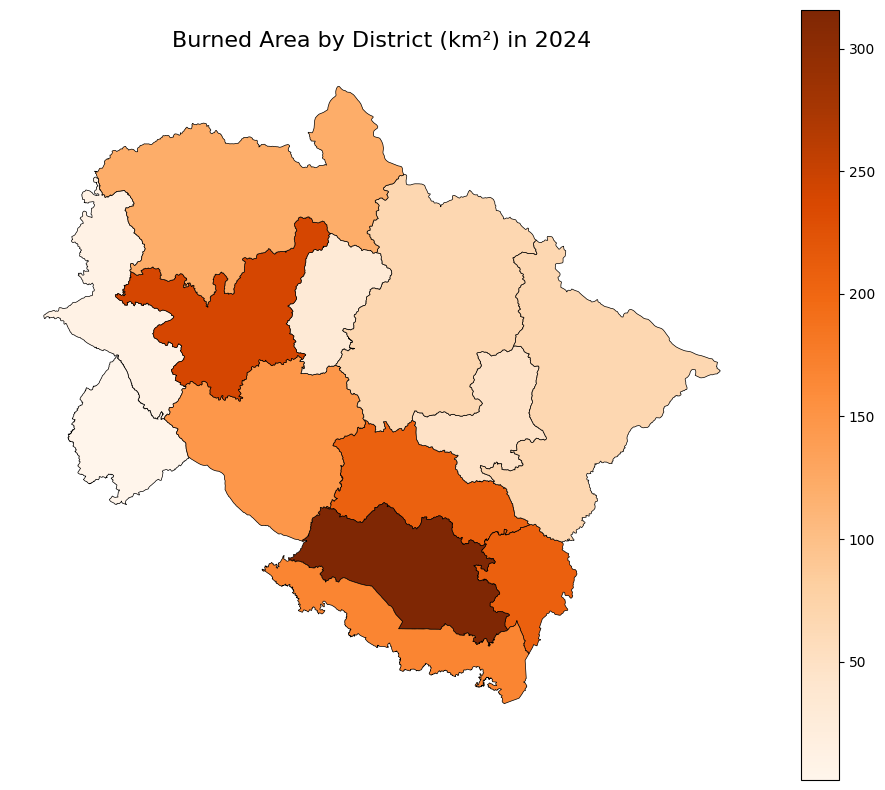

In [ ]:
# Filter for a specific year, e.g., 2024
year_2024_data = yearly_district_analysis[yearly_district_analysis["Year"] == 2024]

# Merge the filtered data with the districts GeoDataFrame for mapping
districts_gdf_2024 = districts_gdf.merge(year_2024_data, on="District", how="left")

# Plot the choropleth map for 2024
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
districts_gdf_2024.plot(
    column="total_burned_area",
    cmap="Oranges",
    legend=True,
    edgecolor="black",
    linewidth=0.5,
    ax=ax
)
ax.set_title("Burned Area by District (km²) in 2024", fontsize=16)
ax.axis("off")
plt.show()


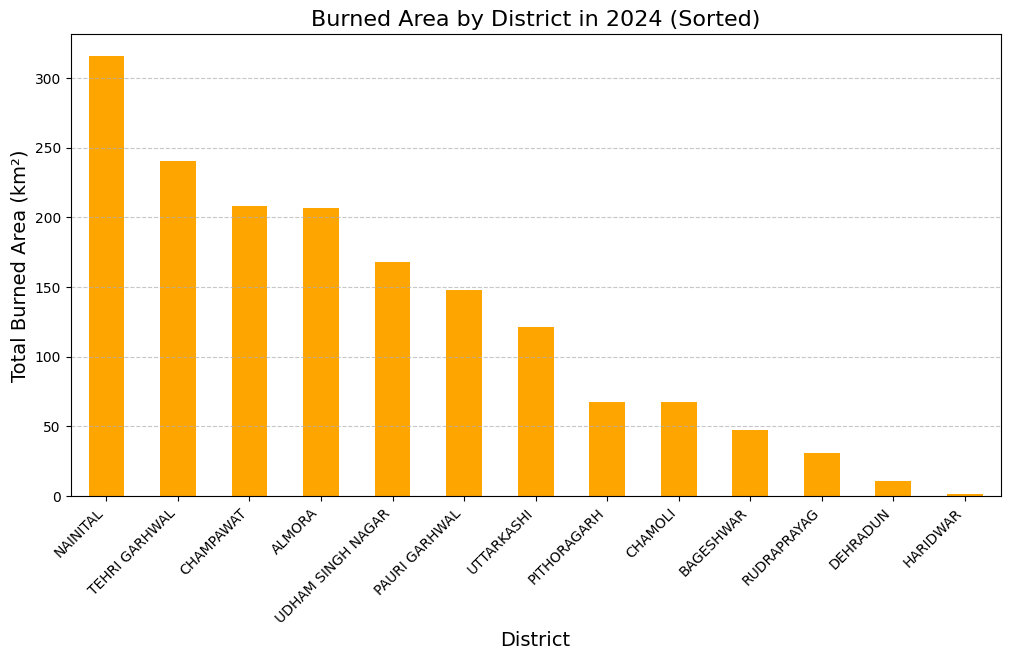

In [ ]:
# Sort the DataFrame by total_burned_area in descending order
year_2024_data_sorted = year_2024_data.sort_values(by="total_burned_area", ascending=False)

# Plot the sorted data
year_2024_data_sorted.plot(
    kind="bar",
    x="District",  # Replace "District" with the actual column name
    y="total_burned_area",
    color="orange",
    figsize=(12, 6),
    legend=False
)

# Add labels and title
plt.title("Burned Area by District in 2024 (Sorted)", fontsize=16)
plt.xlabel("District", fontsize=14)
plt.ylabel("Total Burned Area (km²)", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


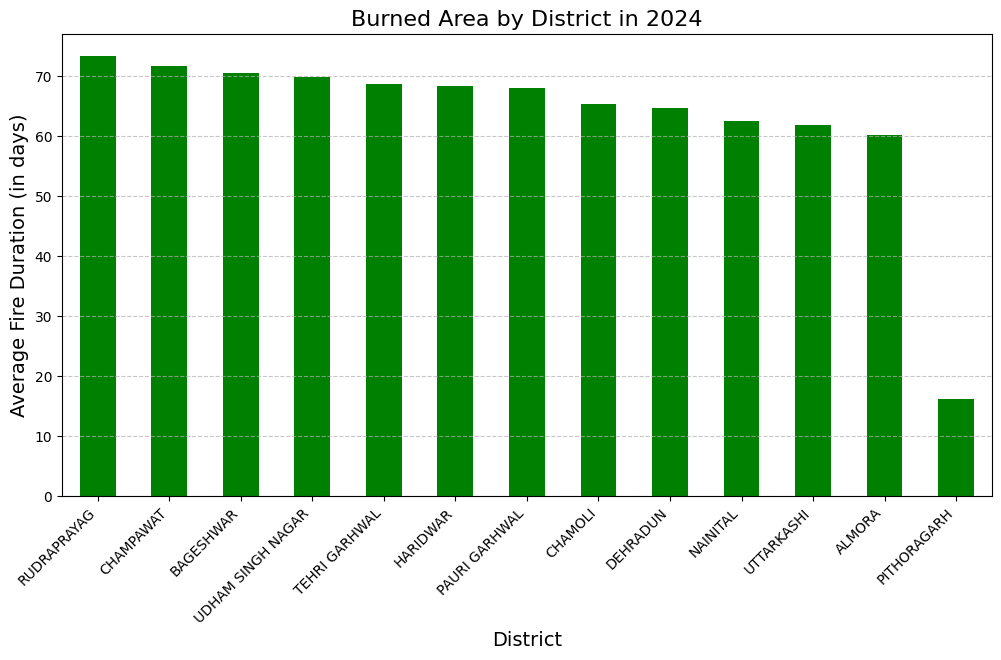

In [ ]:
# Sort the DataFrame by total_burned_area in descending order
year_2024_data_sorted_2 = year_2024_data.sort_values(by="avg_fire_duration", ascending=False)

# Plot the sorted data
year_2024_data_sorted_2.plot(
    kind="bar",
    x="District",  # Replace "District" with the actual column name
    y="avg_fire_duration",
    color="green",
    figsize=(12, 6),
    legend=False
)

# Add labels and title
plt.title("Burned Area by District in 2024", fontsize=16)
plt.xlabel("District", fontsize=14)
plt.ylabel("Average Fire Duration (in days)", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


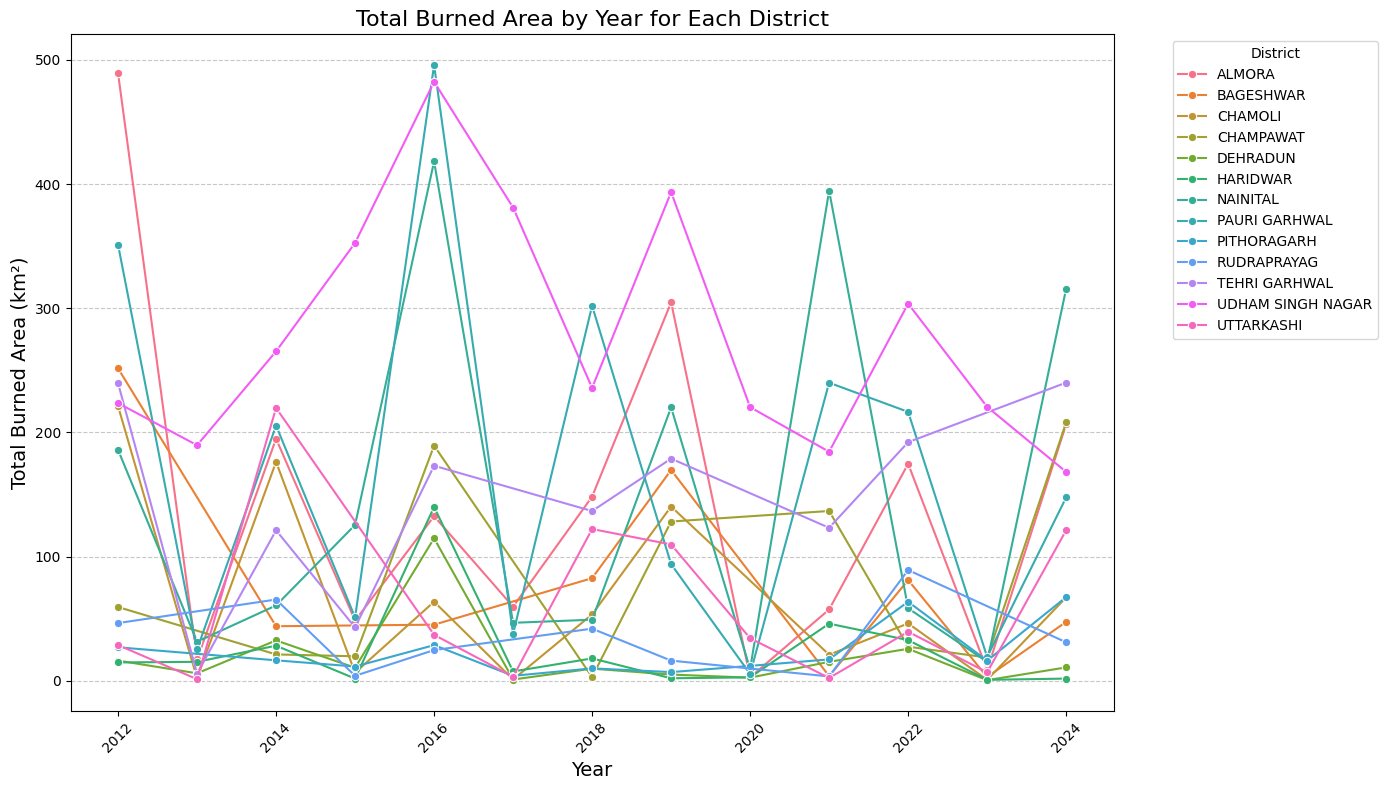

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure size
plt.figure(figsize=(14, 8))

# Create the lineplot
sns.lineplot(
    data=yearly_district_analysis,
    x="Year",
    y="total_burned_area",
    hue="District",
    marker="o"
)

# Add labels, title, and legend
plt.title("Total Burned Area by Year for Each District", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Total Burned Area (km²)", fontsize=14)
plt.legend(title="District", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


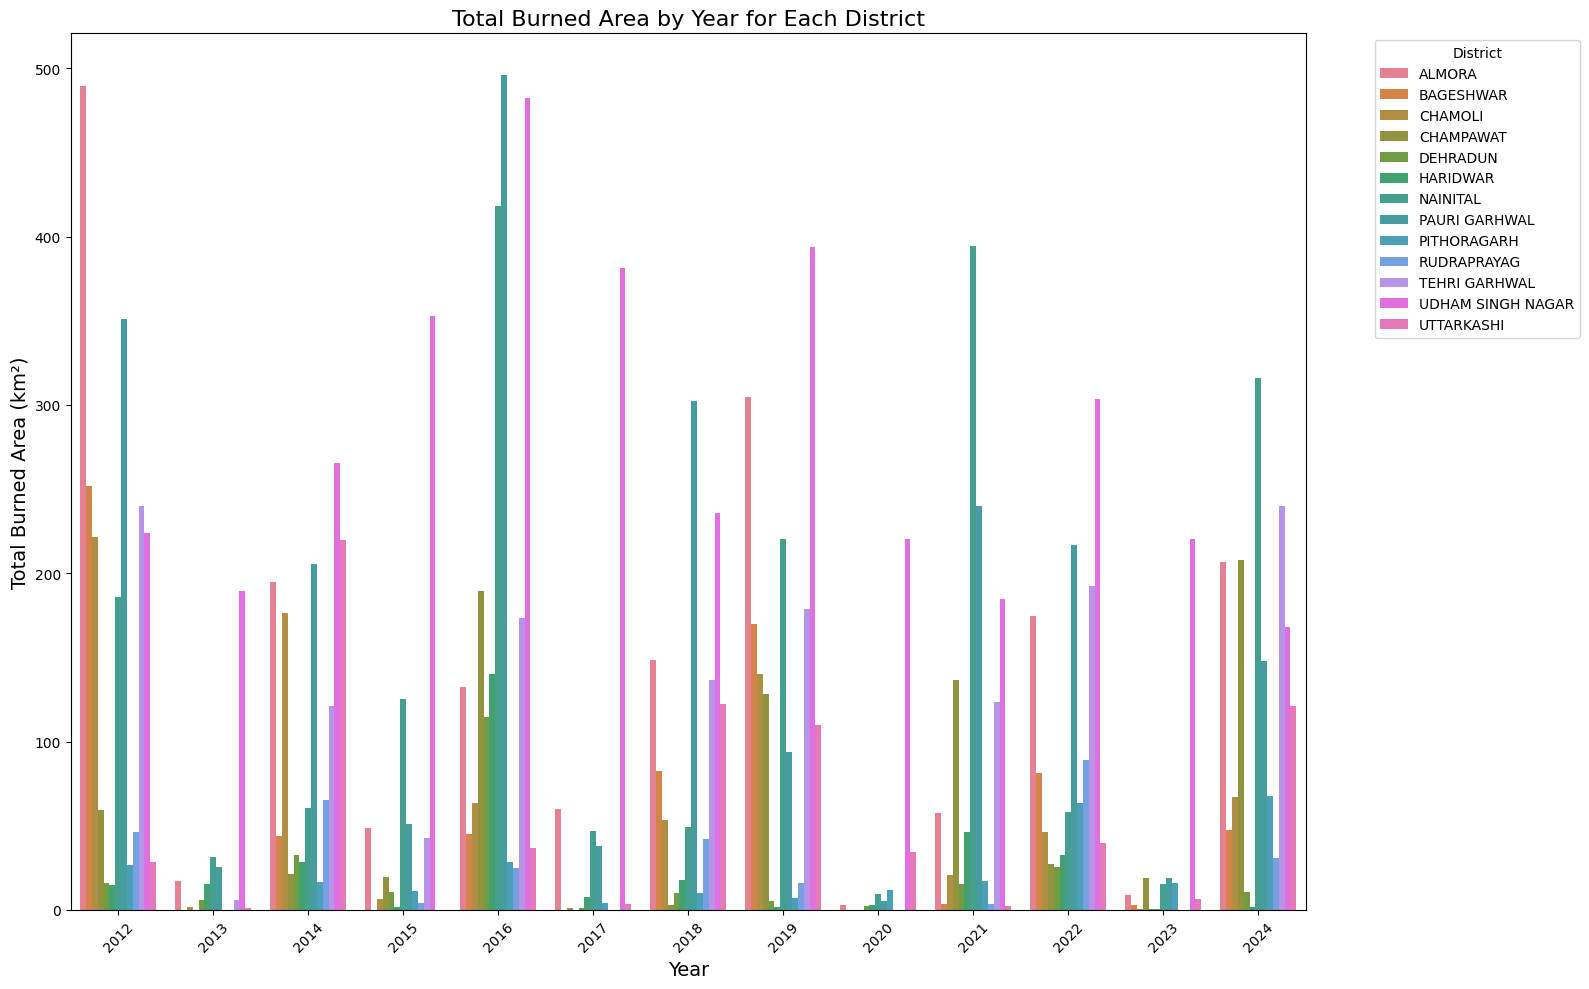

In [ ]:
plt.figure(figsize=(16, 10))
sns.barplot(
    data=yearly_district_analysis,
    x="Year",
    y="total_burned_area",
    hue="District"
)
plt.title("Total Burned Area by Year for Each District", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Total Burned Area (km²)", fontsize=14)
plt.legend(title="District", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


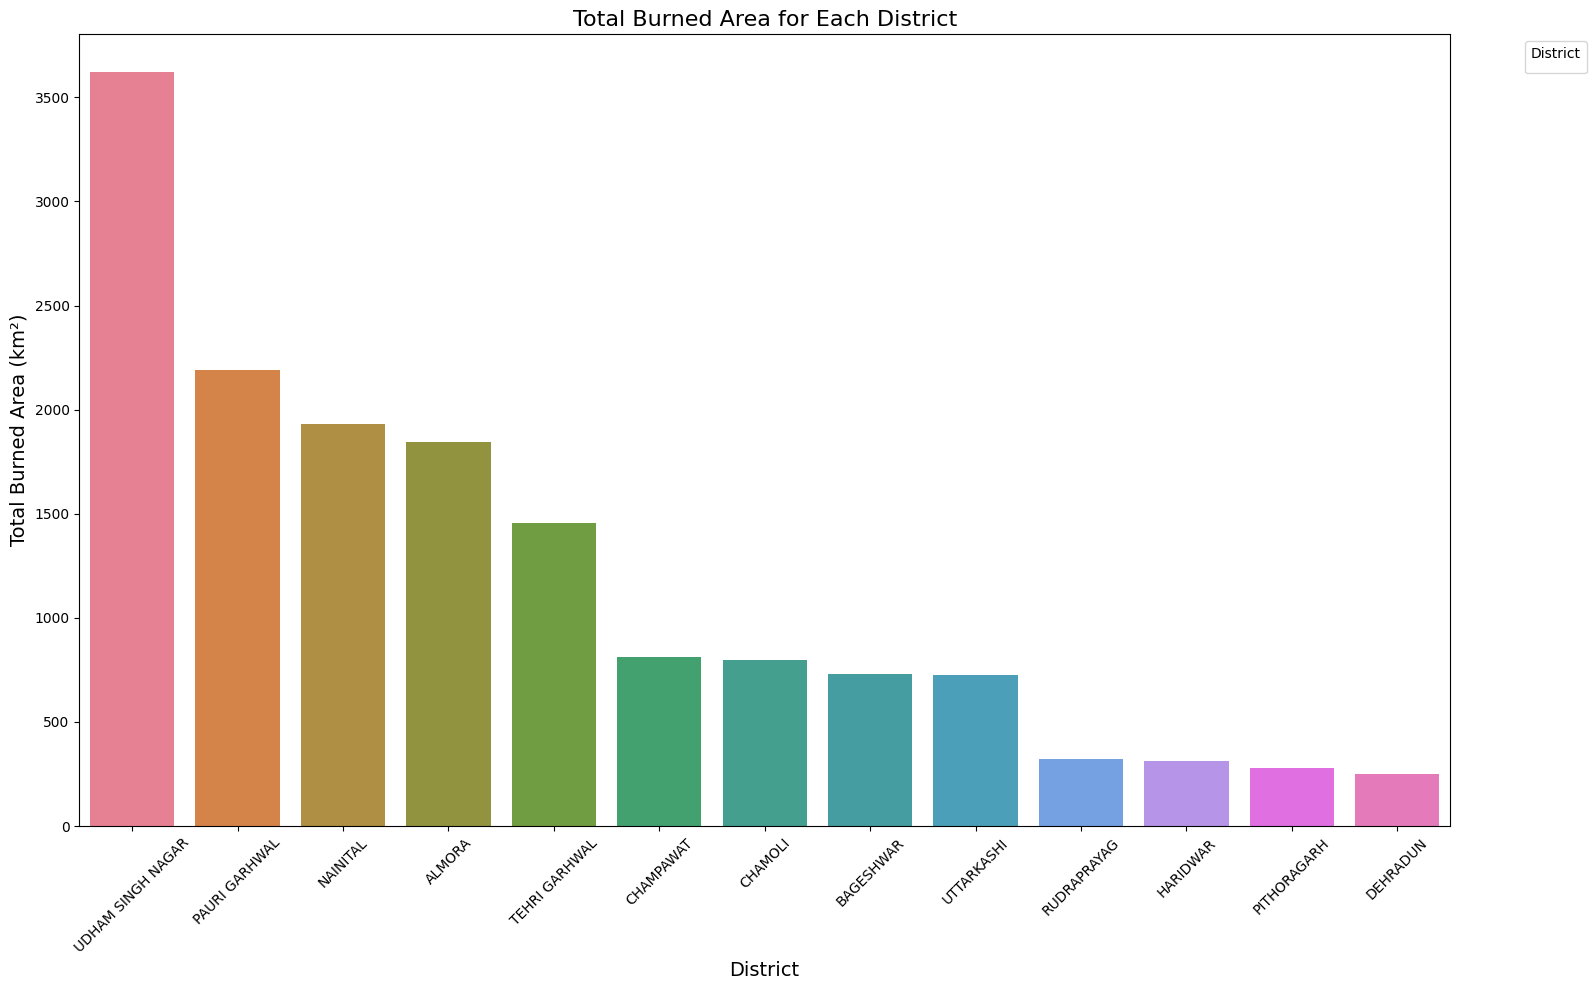

In [ ]:
plt.figure(figsize=(16, 10))
sns.barplot(
    data=district_analysis.sort_values(by="total_burned_area", ascending=False),
    x="District",
    y="total_burned_area",
    hue="District"
)
plt.title("Total Burned Area for Each District", fontsize=16)
plt.xlabel("District", fontsize=14)
plt.ylabel("Total Burned Area (km²)", fontsize=14)
plt.legend(title="District", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
district_analysis.columns

Index(['District', 'total_burned_area', 'avg_fire_duration',
       'max_fire_duration', 'fire_count'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt
def plot_histogram_2(gdf):
  # Plot Fire Duration Histogram
  plt.figure(figsize=(10, 6))
  plt.hist(gdf['avg_fire_duration'], bins=20, color='orange', alpha=0.7, edgecolor='black')
  plt.title("Distribution of Fire Durations")
  plt.xlabel("Duration (days)")
  plt.ylabel("Frequency")
  plt.grid("on")
  plt.show()

  # Plot Burned Area Histogram
  plt.figure(figsize=(10, 6))
  plt.hist(gdf['total_burned_area'], bins=20, color='green', alpha=0.7, edgecolor='black')
  plt.title("Distribution of Burned Areas")
  plt.xlabel("Burned Area (km²)")
  plt.ylabel("Frequency")
  plt.grid("on")
  plt.show()

# Histogram plots for 2012-2024.

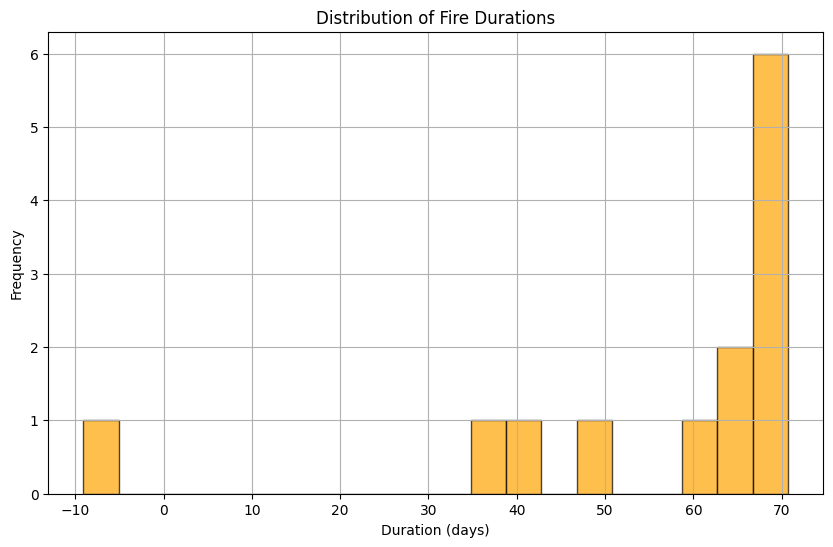

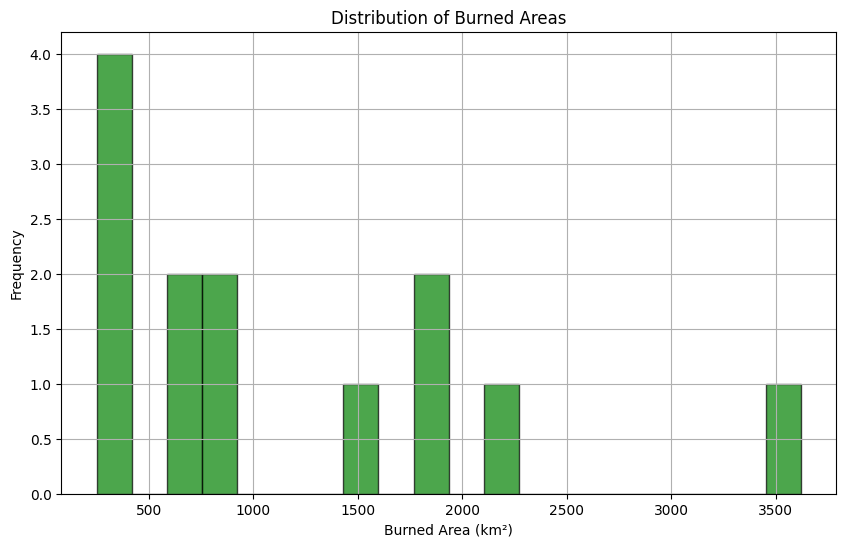

In [ ]:
plot_histogram_2(district_analysis)

# Histogram plots for 2024.

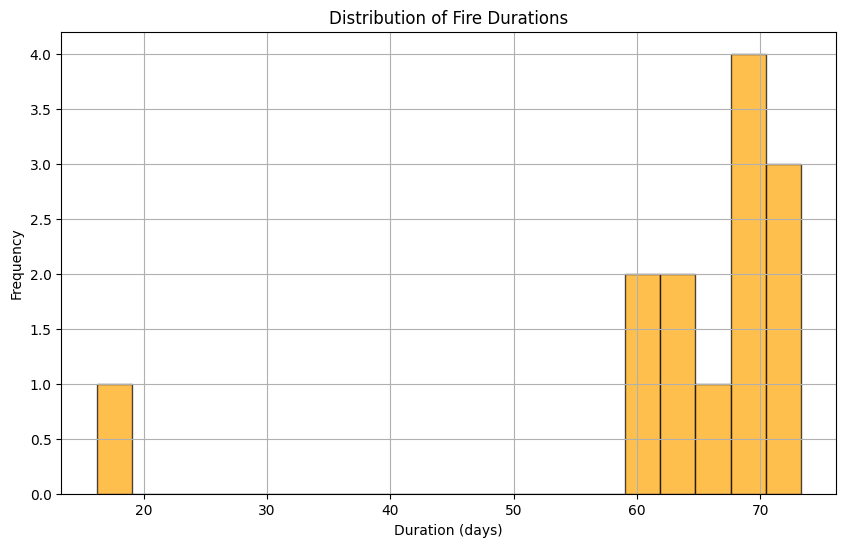

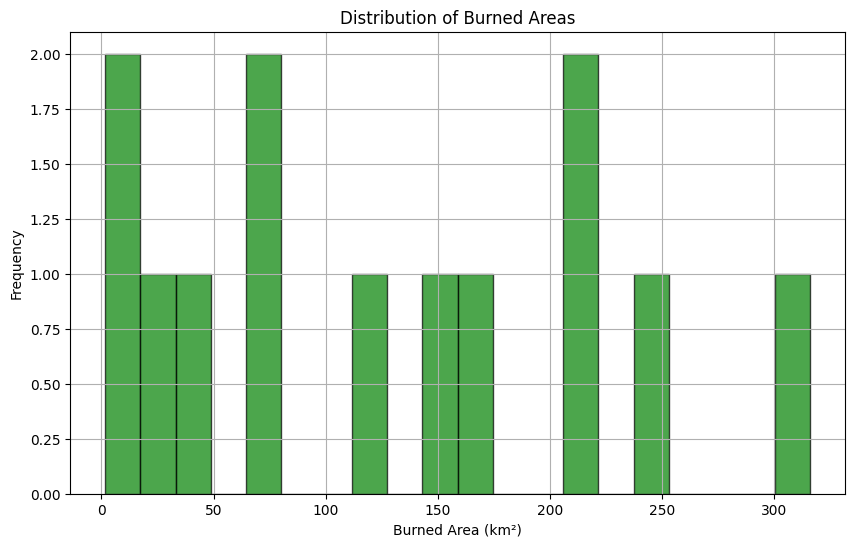

In [ ]:
plot_histogram_2(districts_gdf_2024)